In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [12]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 349E-D4DF

 Directory of c:\Users\kevin\SmartTech CA2

13/01/2024  14:56    <DIR>          .
13/01/2024  14:56    <DIR>          ..
13/01/2024  14:36                 0 SmartTech_Ca2.ipynb
12/01/2024  16:44    <DIR>          Test Drive
               1 File(s)              0 bytes
               3 Dir(s)  138,402,705,408 bytes free


In [13]:
datadir = "Test Drive"
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
print(data.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
1     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
2     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
3     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
4     C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
...                                                 ...   
7511  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7512  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7513  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7514  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   
7515  C:\Users\kevin\Desktop\Test Drive\IMG\center_2...   

                                                   left  \
0     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
1     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
2     C:\Users\kevin\Desktop\Test Drive\IMG\left_202...   
3     C:\Users\kevin\Desk

In [14]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [15]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [16]:
print(data.head)


<bound method NDFrame.head of                                   center                              left  \
0     center_2024_01_12_16_35_44_403.jpg  left_2024_01_12_16_35_44_403.jpg   
1     center_2024_01_12_16_35_44_470.jpg  left_2024_01_12_16_35_44_470.jpg   
2     center_2024_01_12_16_35_44_538.jpg  left_2024_01_12_16_35_44_538.jpg   
3     center_2024_01_12_16_35_44_608.jpg  left_2024_01_12_16_35_44_608.jpg   
4     center_2024_01_12_16_35_44_678.jpg  left_2024_01_12_16_35_44_678.jpg   
...                                  ...                               ...   
7511  center_2024_01_12_16_44_25_759.jpg  left_2024_01_12_16_44_25_759.jpg   
7512  center_2024_01_12_16_44_25_828.jpg  left_2024_01_12_16_44_25_828.jpg   
7513  center_2024_01_12_16_44_25_898.jpg  left_2024_01_12_16_44_25_898.jpg   
7514  center_2024_01_12_16_44_25_970.jpg  left_2024_01_12_16_44_25_970.jpg   
7515  center_2024_01_12_16_44_26_048.jpg  left_2024_01_12_16_44_26_048.jpg   

                                 

In [17]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


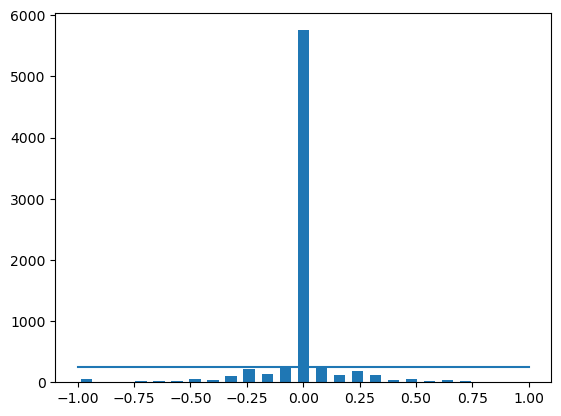

In [18]:
centre = (bins[:-1] + bins[1:])*0.5
samples_per_bin = 250
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [19]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if bins[j] <= data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [20]:
print("Removed: ", len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print("Remaining: ", len(data))

Removed:  5526
Remaining:  1990


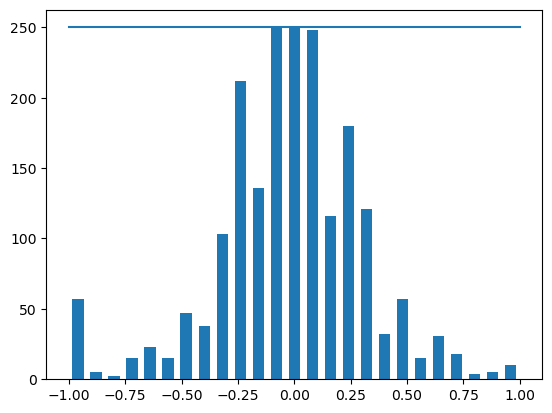

In [21]:
hist, bins = np.histogram(data['steering'], num_bins)
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [22]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [23]:
image_paths, steerings = load_img_steering(datadir+'/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

In [24]:
print(f"Traing samples {len(X_train)}, validation samples {len(X_valid)}")

Traing samples 1592, validation samples 398


Text(0.5, 1.0, 'Validation set')

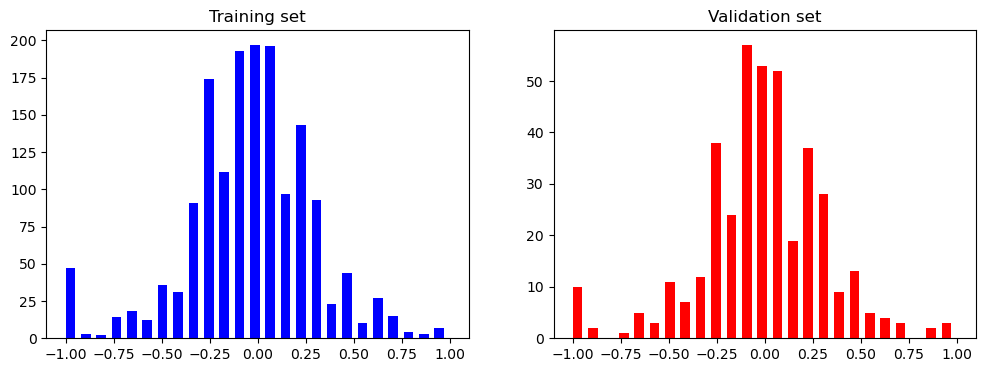

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [26]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

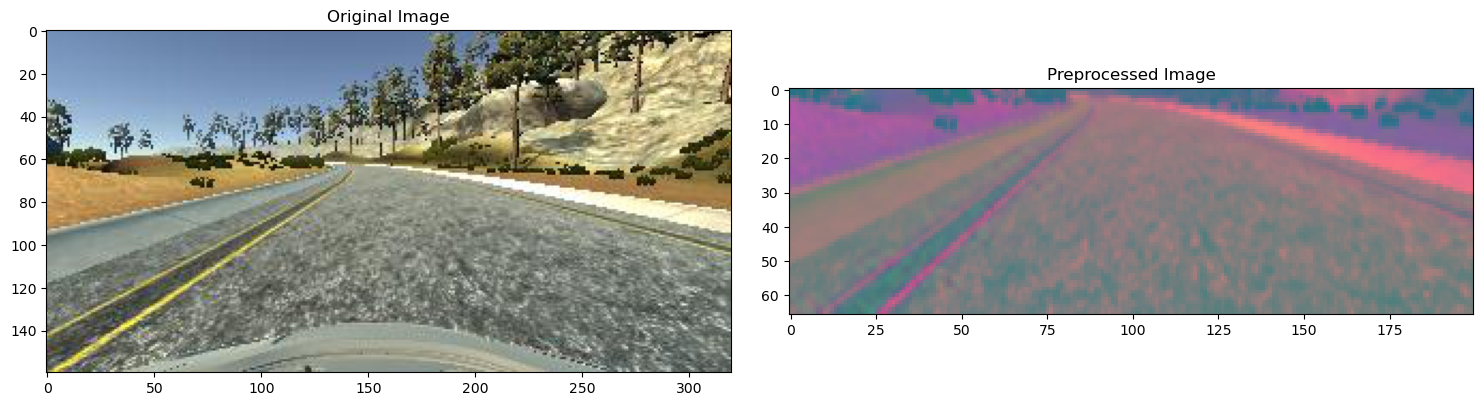

In [27]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axes = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")

In [28]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

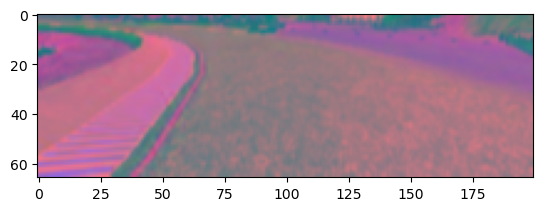

In [29]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])

In [30]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(learning_rate = 0.001)
  model.compile(loss='mse', optimizer = optimizer)
  return model


In [31]:
model = nvidia_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30

16/16 [==============================] - 3s 85ms/step - loss: 0.8356 - val_loss: 0.1005
Epoch 2/30
16/16 [==============================] - 1s 85ms/step - loss: 0.2885 - val_loss: 0.1223
Epoch 3/30
16/16 [==============================] - 1s 66ms/step - loss: 0.1456 - val_loss: 0.0933
Epoch 4/30
16/16 [==============================] - 1s 73ms/step - loss: 0.1195 - val_loss: 0.0822
Epoch 5/30
16/16 [==============================] - 1s 63ms/step - loss: 0.1060 - val_loss: 0.0834
Epoch 6/30
16/16 [==============================] - 1s 70ms/step - loss: 0.0956 - val_loss: 0.0721
Epoch 7/30
16/16 [==============================] - 1s 62ms/step - loss: 0.0938 - val_loss: 0.0697
Epoch 8/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0858 - val_loss: 0.0680
Epoch 9/30
16/16 [==============================] - 1s 59ms/step - loss: 0.0859 - val_loss: 0.0699
Epoch 10/30
16/16 [==============================] - 1s 62ms/step - loss: 0.0881 - val_loss: 0.0687
Epoch 11

Text(0.5, 0, 'Epoch')

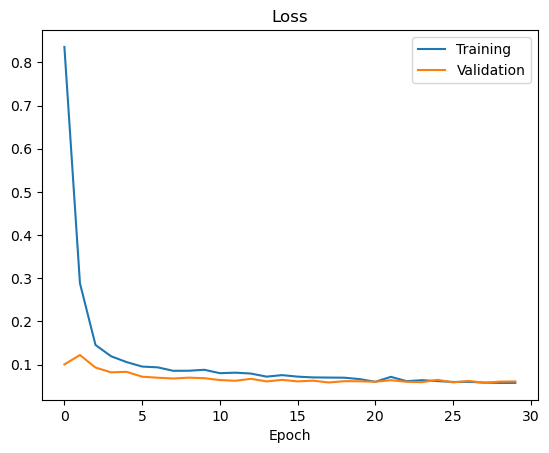

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [34]:
model.save('alpha_model.h5')

c:\Users\kevin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
